In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\HP\Desktop\AMAZON SALES ANALYSIS\archive\Amazon Sale Report.csv")

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
df.New

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
128971   NaN
128972   NaN
128973   NaN
128974   NaN
128975   NaN
Name: New, Length: 128976, dtype: float64

In [8]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

##### Dropping column New and Pendings as they only contain null values

In [9]:
col_to_drop = ['New', 'PendingS']
df = df.drop(columns = col_to_drop)

In [10]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [11]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [12]:
df.shape

(128976, 19)

##### Removing null values from the dataframe

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(37514, 19)

##### Changing datatypes of columns

In [15]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5004\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [18]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [19]:
df.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


##### Describe for specific columns

In [20]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


In [21]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


#### Claculating Percentage Breakown of sizes sold 

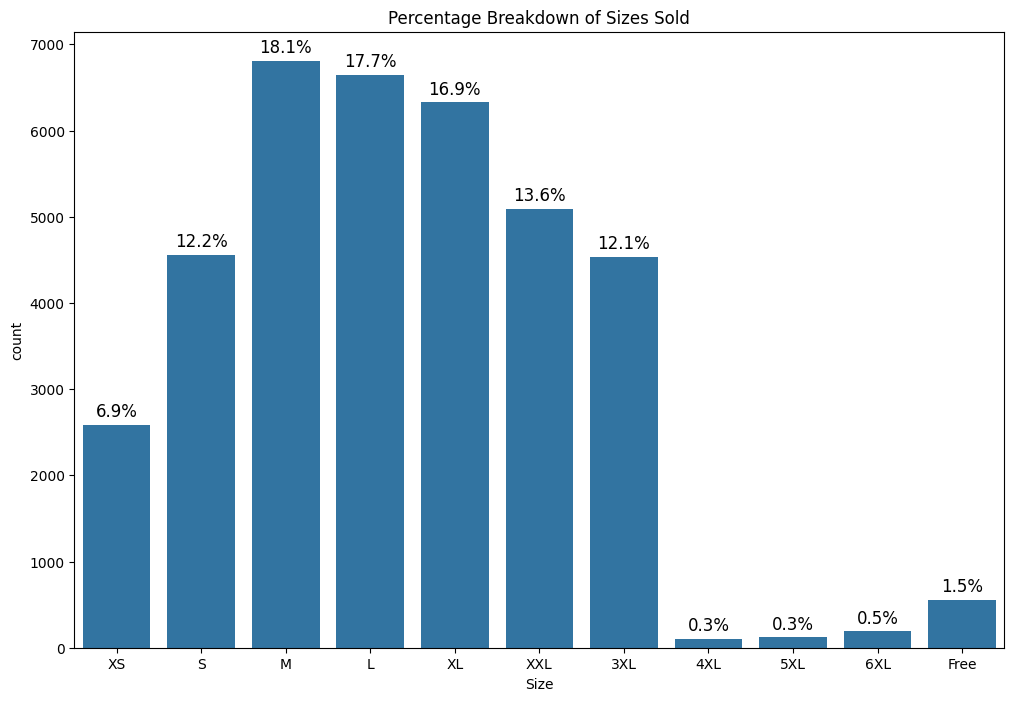

In [31]:
plt.figure(figsize=(12, 8)) 
plt
ax = sns.countplot(x='Size', data=df, order=['XS','S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL','Free'])

total = len(df)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', padding=3, fontsize = 12, color='black', rotation=0, 
                 labels=[f'{(bar.get_height() / total) * 100:.1f}%' for bar in bars])

plt.title("Percentage Breakdown of Sizes Sold")
plt.show()

#### Calculating Monthly Sales trend over time

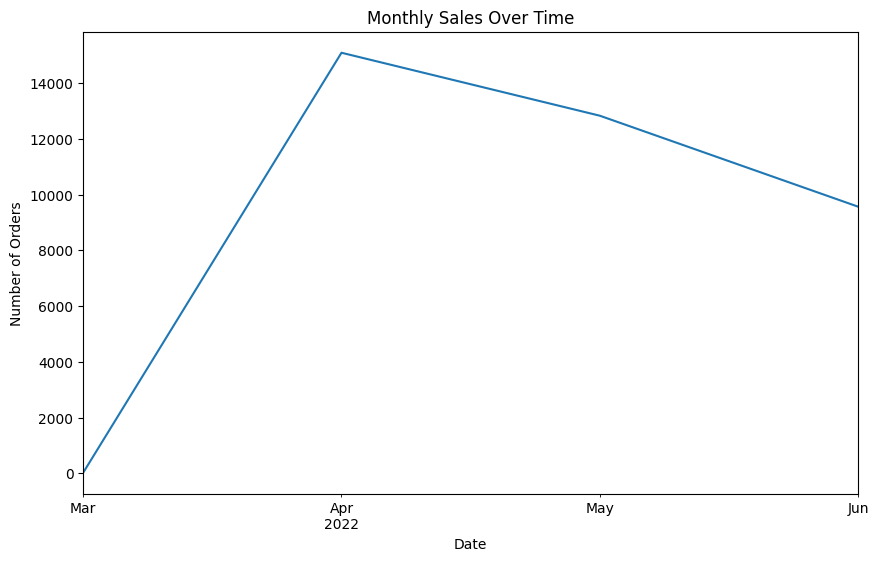

In [37]:
monthly_sales = df.resample('M', on = 'Date').size()

plt.figure(figsize = (10,6))
monthly_sales.plot(title = 'Monthly Sales Over Time')
plt.ylabel('Number of Orders')
plt.show()

#### Distribution of Product Categories

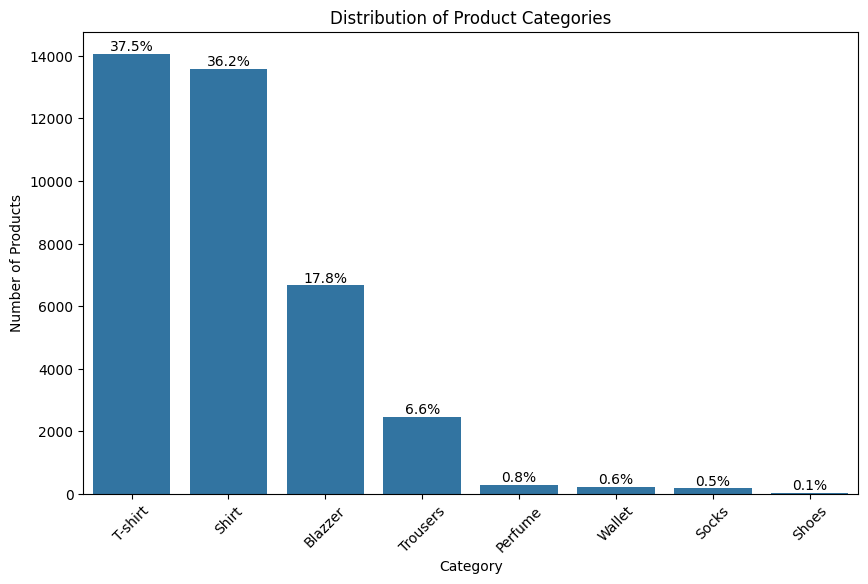

In [43]:
category_counts = df['Category'].value_counts()
total = len(df)  

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')


for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


#### B2B VS Non-B2B Distribution

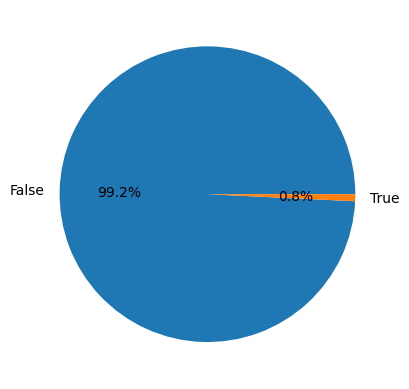

In [50]:
b2b_sales = df['B2B'].value_counts()

plt.pie(b2b_sales, labels = b2b_sales.index, autopct = '%1.1f%%')
plt.title='B2B VS Non-B2B Distribution'
plt.show()

#### Maximum 99.2% of buyers are retailers and 0.8% are wholesalers

### Plotting available sizes for each category

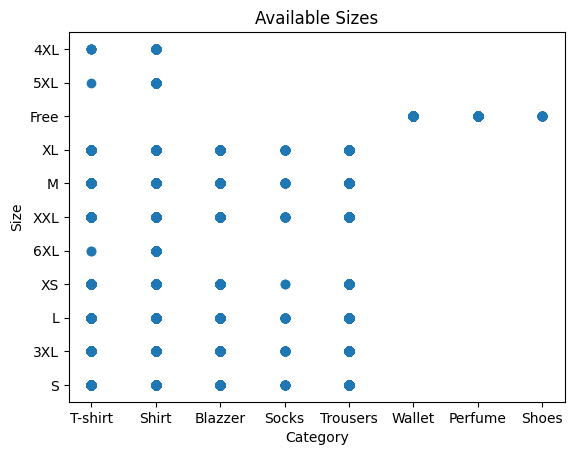

In [59]:
x_data = df['Category']
y_data = df['Size']

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.set_xlabel('Category')
ax.set_ylabel('Size')
ax.set_title('Available Sizes')  
plt.show()


#### Distribution of Orders by State

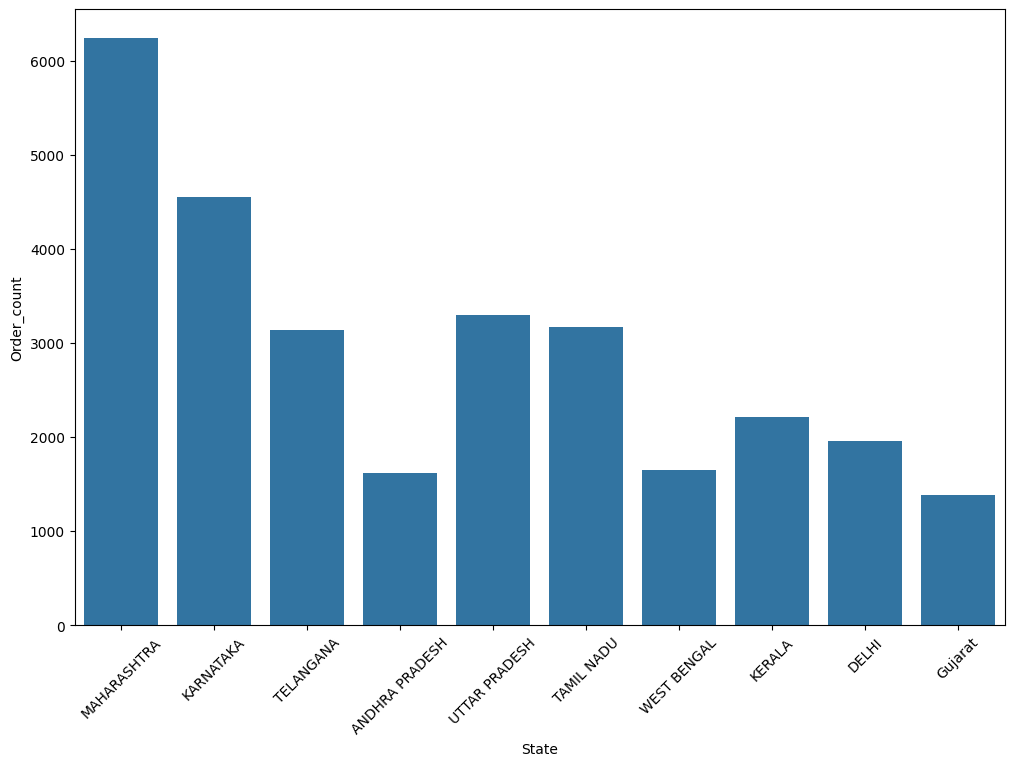

In [68]:
top10_state = df['ship-state'].value_counts().head(10)

plt.figure(figsize = (12,8))
sns.countplot(data = df[df['ship-state'].isin(top10_state.index)], x = 'ship-state')
plt.xlabel('State')
plt.ylabel('Order_count')
plt.xticks(rotation=45)
plt.show()